# Flight Data Exploration
## by Kevin Wu

## Preliminary Wrangling

This document explores a dataset containing flight attributes for almost 2,389,217 flights in 2008. To reduce runtime, only the month of January was analyzed, which has 605,765 entries.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read 2008 flight data

df=pd.read_csv('2008.csv')

In [3]:
# Query only data for January to reduce runtime

df=df[df.Month == 1]

In [4]:
print(df.shape)
print(df.dtypes)

(605765, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [5]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
506635,2008,1,14,1,1751.0,1720,1918.0,1850,AA,1372,...,10.0,20.0,0,NaN,0,0.0,9.0,0.0,0.0,19.0
575894,2008,1,11,5,727.0,735,1049.0,1046,CO,1401,...,4.0,36.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
42470,2008,1,16,3,1800.0,1800,1853.0,1900,WN,47,...,2.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
167105,2008,1,28,1,1055.0,1055,1220.0,1225,OH,5261,...,5.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
329421,2008,1,15,2,731.0,730,954.0,946,EV,4357,...,8.0,32.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
466750,2008,1,27,7,717.0,720,937.0,938,9E,5670,...,10.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
104325,2008,1,8,2,2105.0,2110,2214.0,2229,XE,2840,...,5.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
85979,2008,1,29,2,1723.0,1725,1810.0,1815,WN,2970,...,5.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
485216,2008,1,17,4,1915.0,1850,2056.0,2040,AA,463,...,3.0,15.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
332040,2008,1,16,3,1415.0,1415,1444.0,1447,EV,4442,...,5.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,605765.0,605765.0,605765.000000,605765.000000,588457.000000,605765.000000,587130.000000,605765.000000,605765.000000,587130.000000,...,605765.000000,587130.000000,588457.000000,605765.000000,605765.000000,148807.000000,148807.000000,148807.000000,148807.000000,148807.000000
mean,2008.0,1.0,15.908885,3.848879,1341.313469,1330.337020,1491.156790,1499.829660,2229.870511,128.296963,...,720.257461,6.888546,16.797139,0.028572,0.002191,15.832279,2.888493,16.277326,0.086770,21.140054
std,0.0,0.0,8.994594,1.923451,477.113017,463.361168,502.776793,480.073842,1959.893778,70.263954,...,557.607215,5.014824,10.969598,0.166601,0.046753,39.000363,19.491878,31.697242,1.603085,38.808331
min,2008.0,1.0,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,15.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,8.000000,2.000000,933.000000,930.000000,1116.000000,1120.000000,614.000000,77.000000,...,321.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,1.0,16.000000,4.000000,1333.000000,1325.000000,1520.000000,1522.000000,1551.000000,111.000000,...,576.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,1.0,24.000000,5.000000,1731.000000,1719.000000,1914.000000,1910.000000,3669.000000,159.000000,...,951.000000,8.000000,20.000000,0.000000,0.000000,17.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,1.0,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9202.000000,693.000000,...,4962.000000,213.000000,383.000000,1.000000,1.000000,1158.000000,1049.000000,1357.000000,136.000000,897.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605765 entries, 0 to 605764
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               605765 non-null  int64  
 1   Month              605765 non-null  int64  
 2   DayofMonth         605765 non-null  int64  
 3   DayOfWeek          605765 non-null  int64  
 4   DepTime            588457 non-null  float64
 5   CRSDepTime         605765 non-null  int64  
 6   ArrTime            587130 non-null  float64
 7   CRSArrTime         605765 non-null  int64  
 8   UniqueCarrier      605765 non-null  object 
 9   FlightNum          605765 non-null  int64  
 10  TailNum            595813 non-null  object 
 11  ActualElapsedTime  587130 non-null  float64
 12  CRSElapsedTime     605659 non-null  float64
 13  AirTime            587130 non-null  float64
 14  ArrDelay           587130 non-null  float64
 15  DepDelay           588457 non-null  float64
 16  Or

In [8]:
df[df.Cancelled==1].sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
399670,2008,1,28,1,NaN,1725,NaN,1810,MQ,3912,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
190215,2008,1,14,1,NaN,640,NaN,744,OO,3733,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
94894,2008,1,4,5,NaN,1215,NaN,1325,XE,144,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
338939,2008,1,25,5,NaN,1105,NaN,1242,EV,4673,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
412187,2008,1,23,3,NaN,710,NaN,845,MQ,4365,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
143798,2008,1,21,1,NaN,1600,NaN,1649,YV,2643,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
101035,2008,1,15,2,NaN,940,NaN,1102,XE,7766,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
465810,2008,1,21,1,NaN,2225,NaN,2340,9E,5632,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
220936,2008,1,9,3,NaN,606,NaN,936,UA,91,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
208017,2008,1,25,5,NaN,1930,NaN,2013,OO,5452,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.TailNum.value_counts()

N484HA    398
N480HA    391
N835AL    388
N836AL    383
N487HA    379
         ... 
N189DN      1
N796UA      1
N7ABAA      1
N178DZ      1
N1605       1
Name: TailNum, Length: 4878, dtype: int64

### What is the structure of your dataset?

The dataset has 605,765 entries with 29 attributes. There is a mix of datatypes. For instance, there are categorical data (e.g. Cancelled in boolean), numerical data (e.g. Distance), and datetime data (e.g. Departure Time).

### What is/are the main feature(s) of interest in your dataset?

I am interested in investigating which attributes best predict flight cancellations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since a lot of the attributes are marked as NaN for cancelled flights, predictive attributes are limited to the attributes with data. 

From the attributes with data, I expect the following to have an impact:
1. Carrier
2. Origin
3. Destinations
4. Certain Planes (TailNum)
5. Distance
6. Day of the Week
7. Departure Time
8. Day of the Month

## Univariate Exploration


#### Univariate Exploration #1: 

#### How many flights are cancelled vs not cancelled?

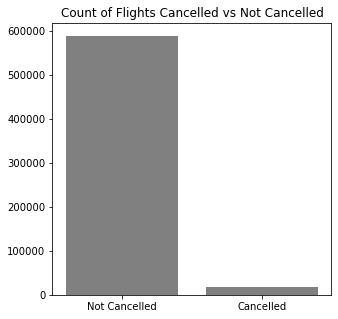

In [10]:
#Plotting cancelled vs non-cancelled flights as .countplot

plt.figure(figsize=[5,5])
sb.countplot(x=df.Cancelled, color='grey');
plt.ylabel(None);
plt.xlabel(None)
plt.title('Count of Flights Cancelled vs Not Cancelled');
plt.xticks(ticks=[0,1],labels=['Not Cancelled', 'Cancelled']);

**Observation:** Cancelled flights make up a small percentage of the total flights. 

#### Univariate Exploration #2: 
#### How are the cancellation codes distributed between cancellations?

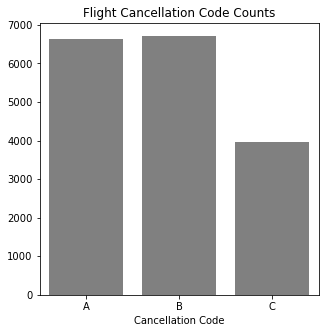

In [11]:
#Plotting flight cancellation codes as .countplot

plt.figure(figsize=[5,5])
order1= ['A', 'B', 'C']
sb.countplot(x=df.CancellationCode, color='grey', order=order1);
plt.ylabel(None);
plt.xlabel('Cancellation Code')
plt.title('Flight Cancellation Code Counts');

**Observation:** It appears that most cancellations are due to carrier reasons (A) and weather (B). This appears to suggest that certain origins/destinations and carriers/planes might have higher cancellations due to propensity for certain weather conditions and carrier/plane quality.

#### Univariate Exploration #3: 

#### How are total flights distributed per carrier?

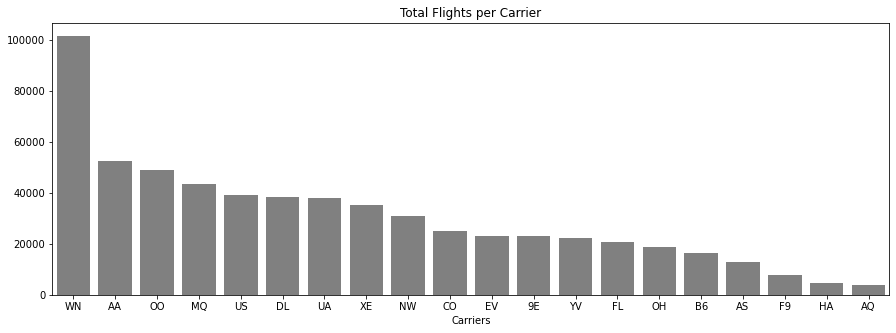

In [12]:
# Ordering carriers by count.
order2=df.UniqueCarrier.value_counts().nlargest(30).index

#Plotting as countplot
plt.figure(figsize=[15,5])
sb.countplot(data=df,x='UniqueCarrier', color='grey', order=order2);
plt.ylabel(None);
plt.xlabel('Carriers');
plt.title('Total Flights per Carrier');

**Observation:** It appears that WN has a big chunk of the flight market share. The #2 airline appears to have less than half WN's flights. Otherwise, flights appear to distribute gradually down.

#### Univariate Exploration #4: 

#### What are the destinations with the most flights? How are flights distributed between destinations?

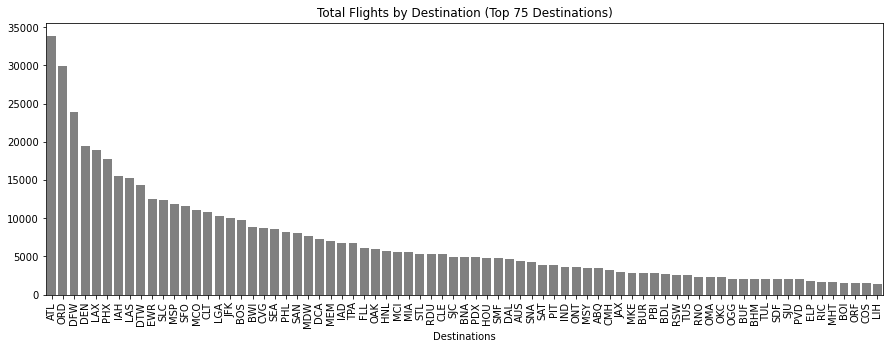

In [13]:
# Querying and ordering the top 75 destinations for plotting.
order3=df.Dest.value_counts().nlargest(75).index

#Plotting as countplot
plt.figure(figsize=[15,5])
sb.countplot(data=df, x='Dest', color='grey', order=order3);
plt.xticks(rotation=90);
plt.ylabel(None);
plt.xlabel('Destinations');
plt.title('Total Flights by Destination (Top 75 Destinations)');

**Observation:** It appears that most flights occur at international airports as expected such as ATL, ORD, LAX. The distribution between airports and flight counts appears to taper off somewhat gradually as an exponential decay as it gets to more local airports. However, the top airports (1-10) tend to have a bigger market share than the next top airlines as expected.

#### Univariate Exploration #5: 

#### What are the origins with the most flights? How are flights distributed between origins?

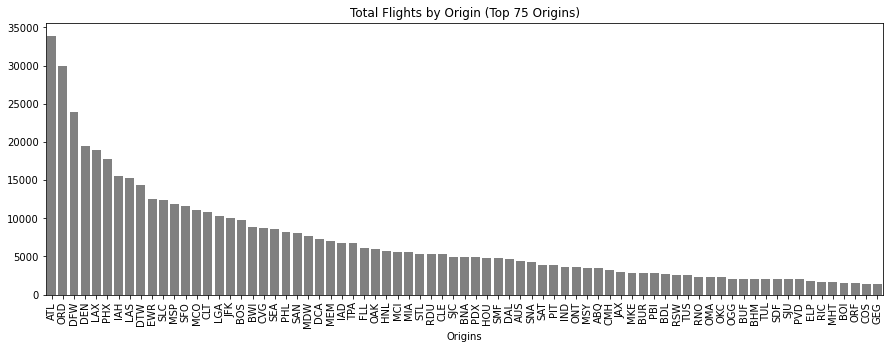

In [14]:
# Querying and ordering the top 75 origins for plotting.
order4=df.Origin.value_counts().nlargest(75).index

#Plotting as countplot
plt.figure(figsize=[15,5])
sb.countplot(data=df, x='Origin', color='grey', order=order4);
plt.xticks(rotation=90);
plt.ylabel(None);
plt.xlabel('Origins');
plt.title('Total Flights by Origin (Top 75 Origins)');

**Observation:** Similar to destinations, flight count tapers down from international airports to more local airports in an expected manner.

#### Univariate Exploration #6:

#### How are flights distributed between specific planes?

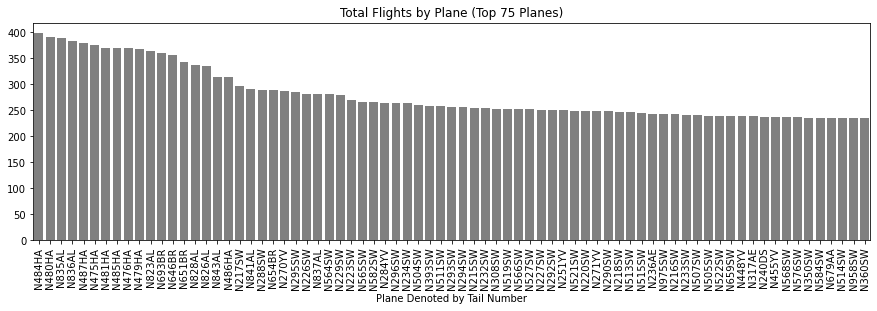

In [15]:
# Querying and ordering the top 75 planes for plotting.
order5=df.TailNum.value_counts().nlargest(75).index

#Plotting as countplot
plt.figure(figsize=(15,4))
sb.countplot(data=df, x='TailNum', color='grey', order=order5);
plt.xticks(rotation=90);
plt.ylabel(None);
plt.xlabel('Plane Denoted by Tail Number');
plt.title('Total Flights by Plane (Top 75 Planes)');

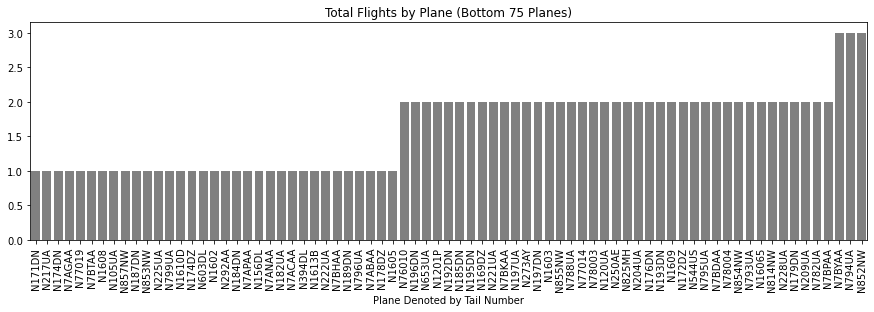

In [16]:
# Querying and ordering the bottom 75 planes for plotting.
order5=df.TailNum.value_counts().nsmallest(75).index

#Plotting as countplot
plt.figure(figsize=(15,4))
sb.countplot(data=df, x='TailNum', color='grey', order=order5);
plt.xticks(rotation=90);
plt.ylabel(None);
plt.xlabel('Plane Denoted by Tail Number');
plt.title('Total Flights by Plane (Bottom 75 Planes)');

**Observation:** Planes appear to have 1 to approximately 400 flights each with a very gradual taper of flights per plane. This does not seem unexpected.

#### Univariate Exploration #7:

#### How are flights distributed by distance?

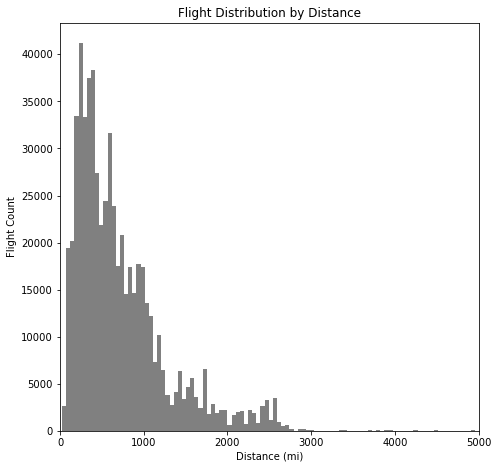

In [17]:
#Plotting histogram of flights according to distance.

plt.figure(figsize=[7.5,7.5])
plt.hist(data=df,x='Distance',bins=100, color='grey');
plt.xlim(0,5000);
plt.ylabel('Flight Count')
plt.xlabel('Distance (mi)');
plt.title('Flight Distribution by Distance');

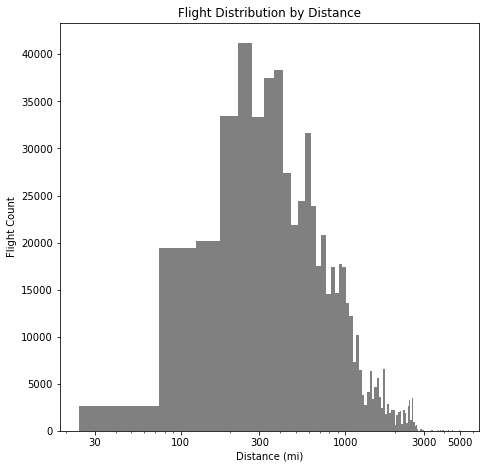

In [18]:
#Plotetd on a log scale.

plt.figure(figsize=[7.5,7.5])
plt.hist(data=df,x='Distance',bins=100, color='grey');
plt.xscale('log');
plt.ylabel('Flight Count')
plt.xlabel('Distance (mi)');
plt.xticks(ticks=[30,100,300,1000,3000,5000],labels=[30,100,300,1000,3000,5000])
plt.title('Flight Distribution by Distance');

**Observation:** Flights appear concentrate around 300mi. The graph is right skewed with bigger distance flights being less common. From the log scale graph, no additional input appears to be gained except to confirm that there are a few spikes, which are likely specific to popular routes.

#### Univariate Exploration #7:

#### How are flights distributed between days of the week?

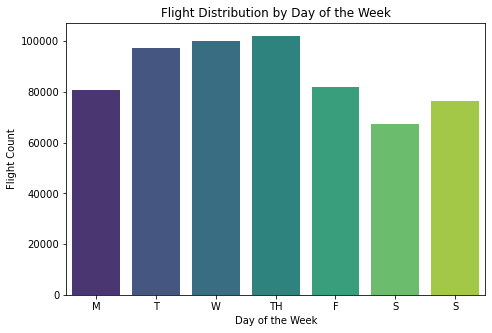

In [19]:
#Plotting

plt.figure(figsize=[7.5,5])
sb.countplot(data = df, x = 'DayOfWeek', palette='viridis');
plt.ylabel('Flight Count')
plt.xlabel('Day of the Week');
plt.xticks([0,1,2,3,4,5,6],['M','T','W','TH','F','S','S'])
plt.title('Flight Distribution by Day of the Week');

**Observation:** Flights generally appear to be somewhat uniformly distributed by day of the week. 

#### Univariate Exploration #8:

#### How are flights distributed according to its scheduled time of departure?

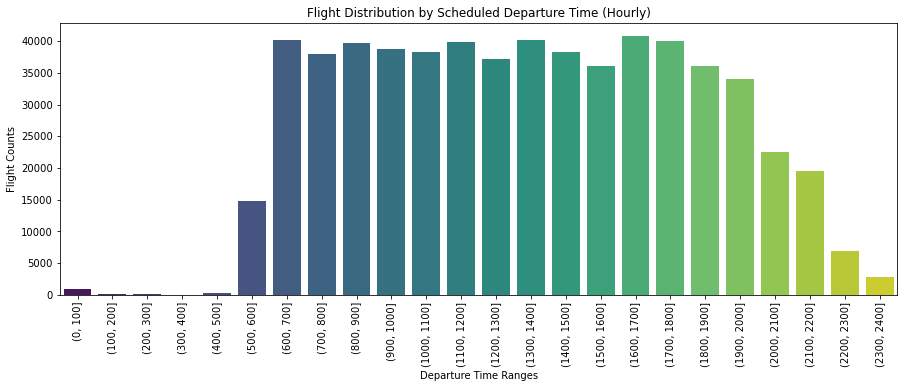

In [20]:
#Cut departure times into hourly bins and create new df for plotting
newbin=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
df['CRSDepTime1']=pd.cut(x=df.CRSDepTime, bins=newbin)
df_cuttimes=pd.DataFrame(df.CRSDepTime1.value_counts()).reset_index()
df_cuttimes.rename(columns={'index':'times'},inplace=True)

#Sort x bins for plotting
df_cuttimes=df_cuttimes.sort_values('times')

#Plotting
plt.figure(figsize=[15,5])
sb.barplot(data=df_cuttimes,x='times', y='CRSDepTime1',palette='viridis');
plt.xticks(rotation=90)
plt.xlabel('Departure Time Ranges');
plt.ylabel('Flight Counts');
plt.title('Flight Distribution by Scheduled Departure Time (Hourly)');

**Observation:** It appears that most flights occur between 6 and 22 hours and are distributed somewhat uniformly between these times. Then it either drops to a few / almost no flights. This is expected due to human behavior and day/night cycles.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My value of interest is cancellations, which is marked either 0 or 1 to determine how many flights are cancelled. This data appears to be clean as only 0 and 1 have been inputted. It is clear that cancellations make up a small percent of all flights. No transformations were performed for the cancellation variable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution for the departure times were unusual, but this was due to human scheduling of flights leading to less overnight flights. The flight distance distribution was a bit unusual due to it spiking, but not unexpected as it might reflect popular origin-destination combos with a specific distance. For the distance feature, I also set the distance count to log scale to see if any other insights were visible, but nothing new was noted.


## Bivariate Exploration

For bi-variate explorations, I have made a DataFrame with just the cancelled flights into df2 below.

In [21]:
#Query cancelled flights only as df2

df2=df[df.Cancelled==1]

#### Bivariate Exploration #1: 

#### How are cancelled and non-cancelled flights distributed between carriers? Which carriers have the highest cancellation rates?

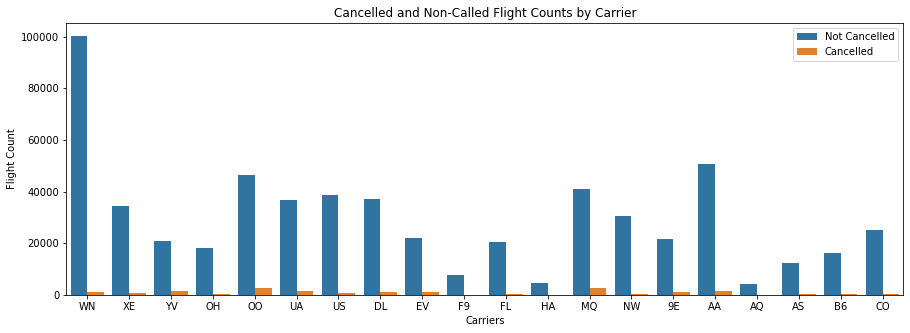

In [22]:
#Clustered bar chart for cancelled and non-cancelled flights per carrier

plt.figure(figsize=(15,5))
sb.countplot(data = df, x = 'UniqueCarrier', hue = 'Cancelled');
plt.legend(labels=['Not Cancelled','Cancelled']);
plt.xlabel('Carriers');
plt.ylabel('Flight Count');
plt.title('Cancelled and Non-Called Flight Counts by Carrier');

In [23]:
#Feature engineering new cancellation proportion table for Carrier.

df3=pd.DataFrame(df2.groupby('UniqueCarrier').Cancelled.count())
df3['all_flights']=pd.DataFrame(df.groupby('UniqueCarrier').Cancelled.count())
df3['cancelled_prop']=df3['Cancelled']*100/df3['all_flights']
df3=df3.sort_values('cancelled_prop', ascending=False)
df3=df3.reset_index()

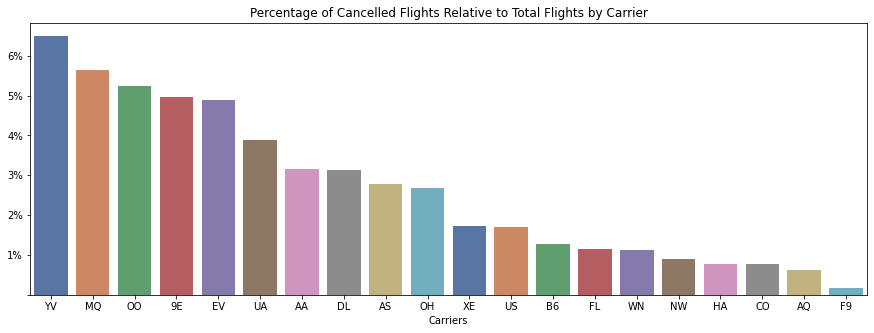

In [24]:
#Barplot cancellation %s per Unique Carrier.
plt.figure(figsize=[15,5])
sb.barplot(data=df3, x='UniqueCarrier', y='cancelled_prop', palette='deep');
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Carrier');
plt.ylabel(None)
plt.xlabel('Carriers')
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=['','1%','2%','3%','4%','5%','6%']);

**Observation:** The main takeaway from these graphs is that airlines with a lot of flights don't necessary have high cancellation rates. However, there is a trend of certain airlines cancelling more often.

Based on the first graph above, some carriers have a higher percentage of cancelled flights. WN, for example, has a low percentage of cancelled flights considering it has so many total flights. This was clarified by feature engineering a column of cancelled flights per carrier. In this graph, it is clear that airlines such as YV, MQ, OO, 93, and EV have much higher cancellation rates relative to WN and AA.

#### Bivariate Exploration #2:

#### What cancellations reasons are generally reported by carriers?

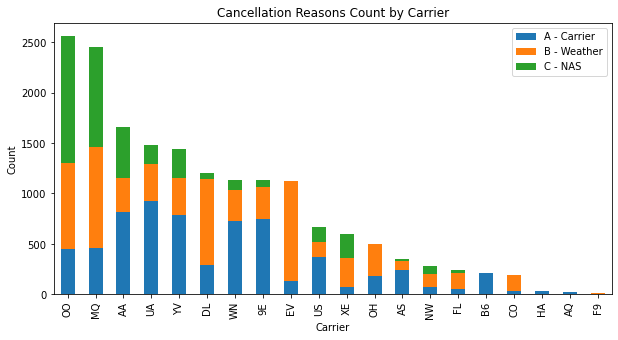

In [25]:
# Setting up dataframe for stacked bar plotting.
df_3=pd.DataFrame(df2.groupby('UniqueCarrier').CancellationCode.value_counts()).unstack();
df_3.CancellationCode=df_3.CancellationCode.fillna(0)
df_3['sum']=df_3.CancellationCode.A+df_3.CancellationCode.B+df_3.CancellationCode.C
df_3=df_3.sort_values('sum', ascending=False)
df_3.drop(columns='sum', inplace=True)

# Plotting stacked bar plot.
df_3.plot(kind='bar',stacked=True,legend=True, figsize=(10,5))
plt.legend(['A - Carrier','B - Weather','C - NAS']);
plt.title('Cancellation Reasons Count by Carrier');
plt.xlabel('Carrier');
plt.ylabel('Count');

**Observation:** It is clear from this graph that some carriers have poorer track records as they tend to cancel due to carrier reasons (CancelCode A). It seems this makes up a big proportion for AA, UA, YV, WN, 9E, OH, AS and especially B6. As noted above, some of these airlines also have higher cancellation rates such as YV (#1 in cancellation rates).

#### Bivariate Exploration #3: 

#### Which destinations have the highest cancellation rates? Which destinations have the lowest cancellation rates?

In [26]:
#Feature engineering new cancellation proportion table for Destination.

df4=pd.DataFrame(df2.groupby('Dest').Cancelled.count())
df4['all_flights']=pd.DataFrame(df.groupby('Dest').Cancelled.count())
df4['cancelled_prop']=df4['Cancelled']*100/df4['all_flights']
df4=df4.sort_values('cancelled_prop', ascending=False)
df4=df4.reset_index()
df4=df4[df4.all_flights>30]

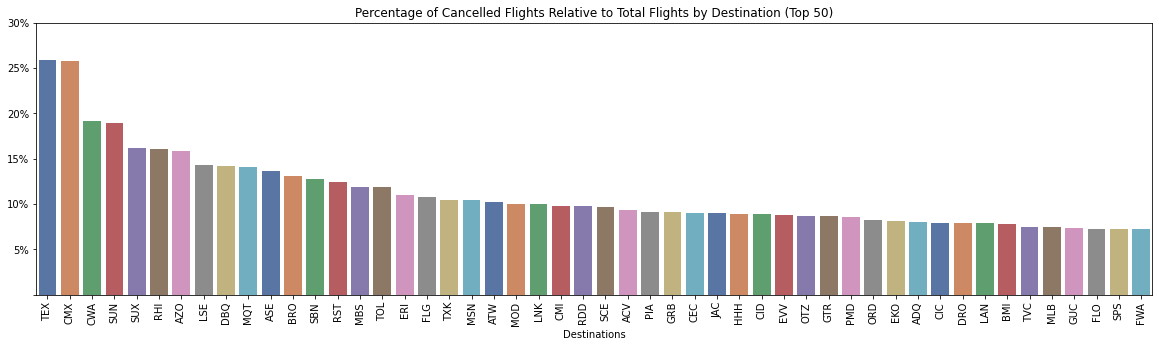

In [27]:
#Barplot cancellation %s per Destination.- Only the 50 most cancelled (by %) destinations shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df4.head(50), x='Dest', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Destination (Top 50)');
plt.ylabel(None);
plt.xlabel('Destinations');
plt.yticks(ticks=[0,5,10,15,20,25,30], labels=['','5%','10%','15%','20%','25%','30%']);

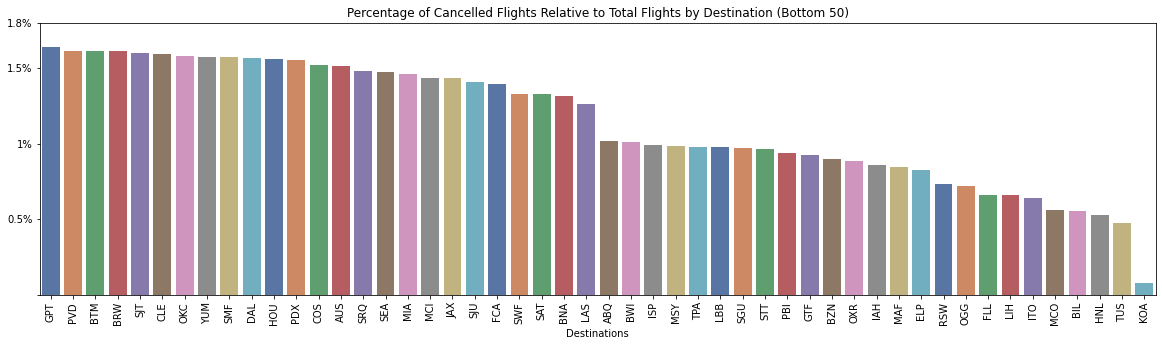

In [28]:
#Barplot cancellation %s per Destination.- Only the 50 least cancelled (by %) destinations shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df4.tail(50), x='Dest', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Destination (Bottom 50)');
plt.ylabel(None);
plt.xlabel('Destinations');
plt.yticks(ticks=[0,0.5,1,1.5,1.8], labels=['','0.5%','1%','1.5%','1.8%']);

**Observation:** From the cancellation % barplots, it is clear that smaller airports (e.g. county and regional) have the highest cancellation percentages. On the other hand, it appears that international airports have less cancellations.

#### Bivariate Exploration #4: 

#### Which origins have the highest cancellation rates? Which origins have the lowest cancellation rates?

In [29]:
#Feature engineering new cancellation proportion table for Origin.

df5=pd.DataFrame(df2.groupby('Origin').Cancelled.count())
df5['all_flights']=pd.DataFrame(df.groupby('Origin').Cancelled.count())
df5['cancelled_prop']=df5['Cancelled']*100/df5['all_flights']
df6=df5.sort_values('cancelled_prop', ascending=False)
df6=df6.reset_index()
df6=df6[df6.all_flights>30]

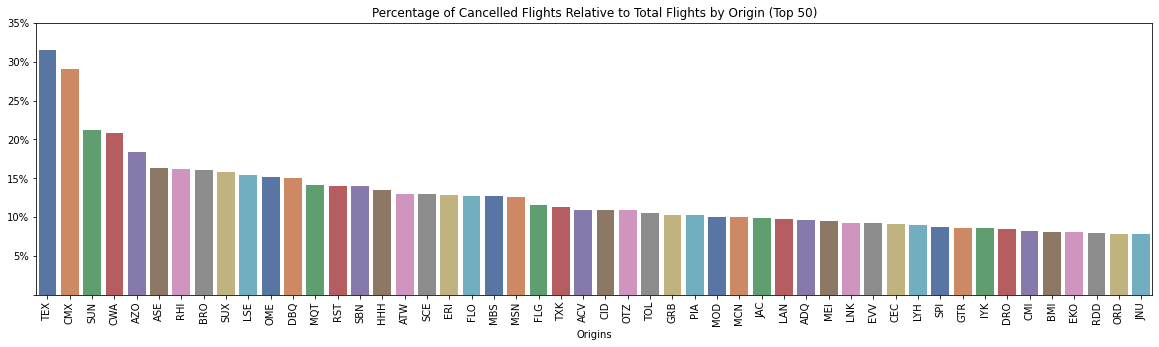

In [30]:
#Barplot cancellation %s per Origin - Only the 50 most cancelled (by %) origins shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df6.head(50), x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Origin (Top 50)');
plt.ylabel(None);
plt.xlabel('Origins');
plt.yticks(ticks=[0, 5, 10, 15, 20, 25, 30, 35], labels=['','5%','10%','15%','20%', '25%', '30%', '35%']);

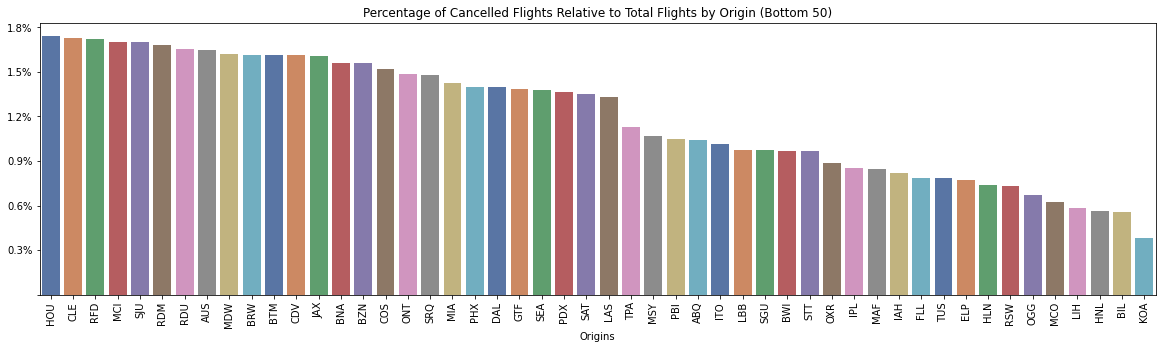

In [31]:
#Barplot cancellation %s per Origin - Only the 50 most cancelled (by %) origins shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df6.tail(50), x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Origin (Bottom 50)');
plt.ylabel(None);
plt.xlabel('Origins');
plt.yticks(ticks=[0,0.3,0.6,0.9,1.2,1.5,1.8], labels=['','0.3%','0.6%','0.9%','1.2%', '1.5%', '1.8%']);

**Observation:** Similar to destinations, international airports appear to have less cancellations than more local airports.

#### Bivariate Exploration #5: 

#### Which planes have the most cancellations? Which planes have the least cancellations?

In [32]:
#Feature engineering new cancellation proportion table for planes according to tail numbers.

df7=pd.DataFrame(df2.groupby('TailNum').Cancelled.count())
df7['all_flights']=pd.DataFrame(df.groupby('TailNum').Cancelled.count())
df7['cancelled_prop']=df7['Cancelled']*100/df7['all_flights']
df7=df7.sort_values('cancelled_prop', ascending=False)
df7=df7.reset_index()
df7=df7[df7.all_flights>30]

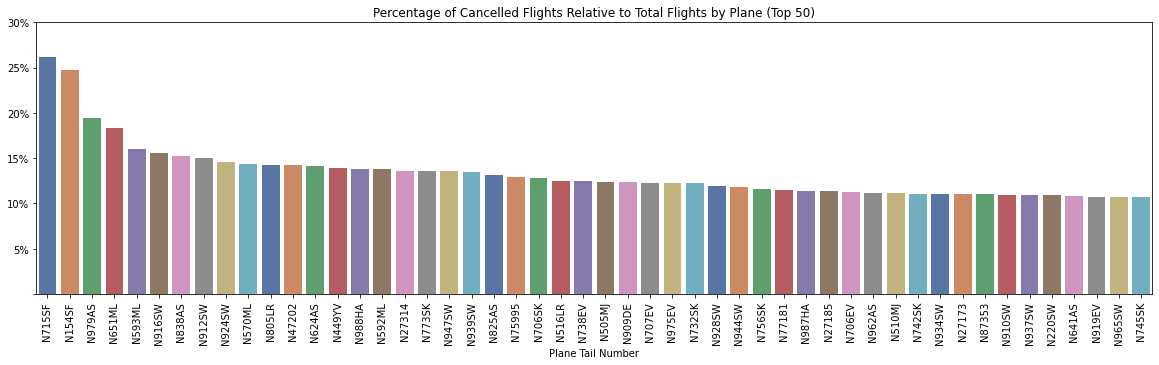

In [33]:
#Barplot for cancellation proportions by plane tail number. Only planes with atleast 30 flights were listed and 
#only planes with the top 50 cancellation proportions were listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df7.head(50), x='TailNum', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Plane (Top 50)');
plt.ylabel(None);
plt.xlabel('Plane Tail Number');
plt.yticks(ticks=[0, 5, 10, 15, 20, 25, 30], labels=['','5%','10%','15%','20%', '25%', '30%']);

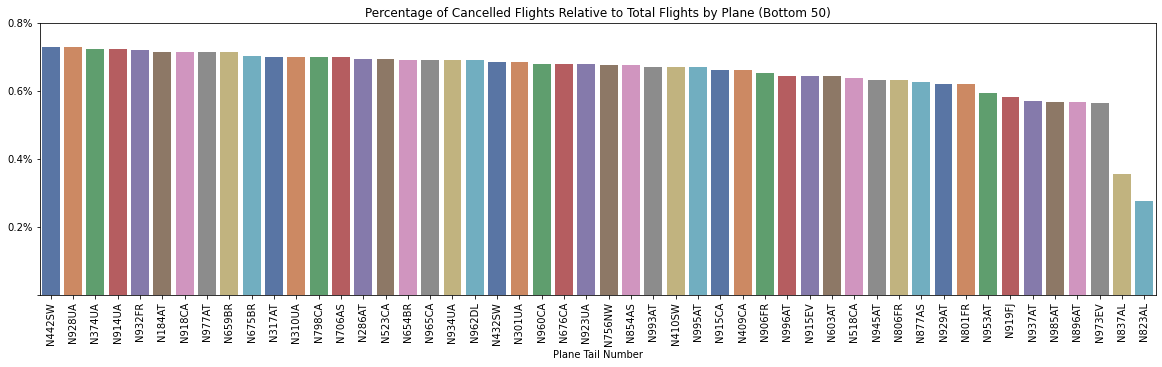

In [34]:
#Barplot for cancellation proportions by plane tail number. Only planes with atleast 30 flights were listed and 
#only planes with the bottom 50 cancellation proportions were listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df7.tail(50), x='TailNum', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Plane (Bottom 50)');
plt.ylabel(None);
plt.xlabel('Plane Tail Number');
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8], labels=['','0.2%','0.4%','0.6%','0.8%']);

**Observation:** Specific planes tend to have a big difference in terms of cancellation rates. However, these might be related to other factors. For instance, if a carrier tends to have a plane on routes with higher cancellation rates, this might reflect as the plane having high cancellation rates. Having data about repair breakdowns and age of planes might help to determine whether certain planes tend to be more faulty and lead to cancellations.

#### Bivariate Exploration #6: 

#### How are cancelled flights distributed by distance?

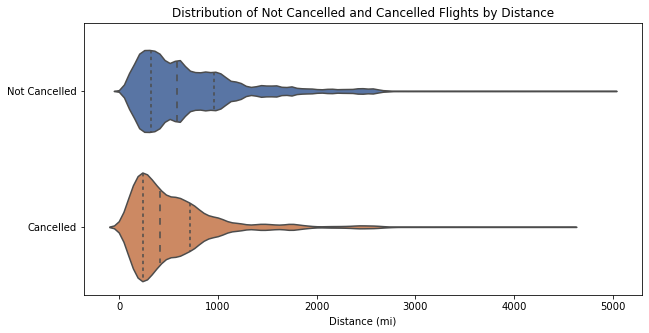

In [35]:
#Plotting violinplot

plt.figure(figsize=(10,5))
sb.violinplot(data=df, x='Distance', y='Cancelled', orient='h', inner='quartile', palette='deep');
plt.yticks([0,1],['Not Cancelled','Cancelled']);
plt.ylabel(None);
plt.xlabel('Distance (mi)')
plt.title('Distribution of Not Cancelled and Cancelled Flights by Distance');

**Observation:** Flights that get cancelled tend to have less than 1000mi in miles. However, this is also due to the fact that most flights are less than 1000mi.

#### Bivariate Exploration #7:

#### Are cancellation percentages higher for specific days of the week?

In [36]:
#Feature engineering new cancellation proportion table by Day of the Week.

df9=df.groupby(['DayOfWeek','Cancelled']).size().unstack()
df9.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df9['total_flights']=df9['Not_Cancelled']+df9['Cancelled']
df9['cancelled_proportion']=df9.Cancelled*100/df9.total_flights
df9=df9.reset_index()

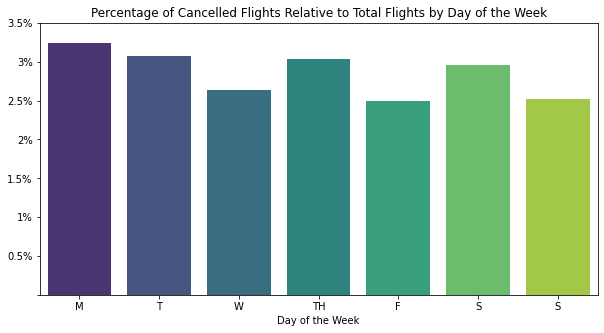

In [37]:
#Plotting

plt.figure(figsize=(10,5))
sb.barplot(data=df9,x='DayOfWeek',y='cancelled_proportion',palette='viridis')
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Day of the Week')
plt.xlabel('Day of the Week');
plt.xticks([0,1,2,3,4,5,6],['M','T','W','TH','F','S','S']);
plt.ylabel(None);
plt.yticks([0.0,0.5,1,1.5,2,2.5,3,3.5],['','0.5%','1%','1.5%','2%','2.5%','3%','3.5%']);

**Observation:** It does not appear that day of the week has a big impact on cancellations as cancellations range from 2.5-3.3%, which is not too significant.

#### Bivariate Exploration #8: 

#### Do some departure times have more cancellations?

In [38]:
# Feature engineering new cancellation proportion table by hourly departure times through hourly bins.

newbin=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
df10=df.copy()
df10.CRSDepTime=pd.cut(x=df10.CRSDepTime, bins=newbin)
df10=df10.groupby(['CRSDepTime','Cancelled']).size().unstack()
df10=df10.reset_index()
df10.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df10['total_flights']=df10['Not_Cancelled']+df10['Cancelled']
df10['cancelled_proportion']=df10.Cancelled*100/df10.total_flights

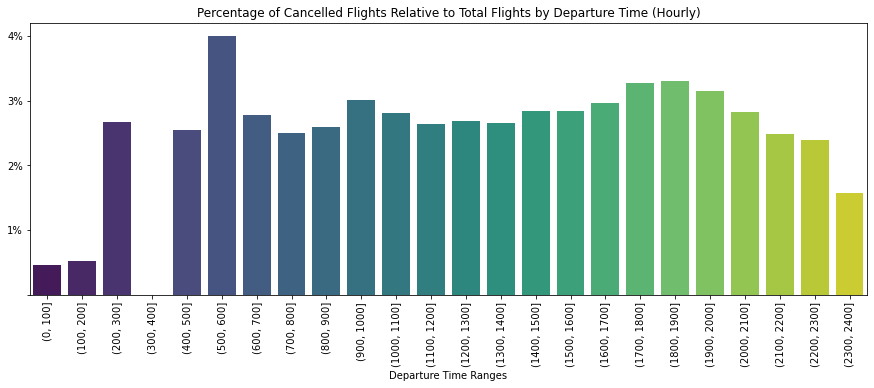

In [39]:
# Plotting

plt.figure(figsize=(15,5))
sb.barplot(data=df10,x='CRSDepTime',y='cancelled_proportion',palette='viridis');
plt.xticks(rotation=90)
plt.xlabel('Departure Time Ranges');
plt.ylabel(None)
plt.yticks([0,1,2,3,4],['','1%','2%','3%','4%']);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Departure Time (Hourly)');

**Observation:** It appears that the worst departure time is between 5-6am as the cancellation rate is approximately 4%. Throughout the day, cancellations rates are steady betweeen 2.5 and 3%. The time slots between 23:00 to 2:00 and 3:00 and 4:00 appear to have the lowest cancellation rates ranging from 0 to ~1.6%.

#### Bivariate Exploration #9:

#### Is there a correlation between distance, day of the week, and departure times?

In [40]:
numeric_vars = ['Distance','DayOfWeek','CRSDepTime']

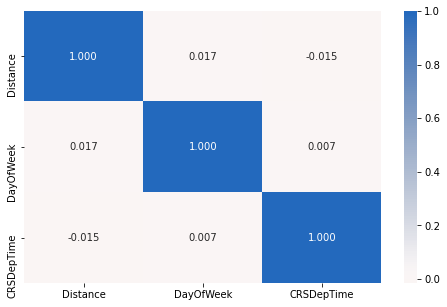

In [41]:
# Correlation matrix plotting
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Observation:** It appears there isn't much of a correlation between the three variables as their correlation is near 0 when compared between each other.

#### Bivariate Exploration #10:

#### Are certain destination-origin combinations (routes) worse than others in terms of cancellation rates?

In [42]:
#Creating dataframe to feature engineer cancelled proportions for specific routes.

df11=df.copy()
df11['route']= df11.Origin +'-'+ df11.Dest
df11=df11.groupby(['route','Origin','Dest','Cancelled']).size().unstack()
df11=df11.reset_index()
df11.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df11.Cancelled.replace(np.nan,0, inplace=True)
df11['total_flights']=df11['Not_Cancelled']+df11['Cancelled']
df11['cancelled_proportion']=df11.Cancelled*100/df11.total_flights
df11.drop(columns=['Cancelled','Not_Cancelled'], inplace=True)

#Only routes with more than 50 total flights included in analysis.
df11=df11[df11.total_flights>50]

#Ordering df11 for plotting.
df11=df11.sort_values('cancelled_proportion', ascending=False)

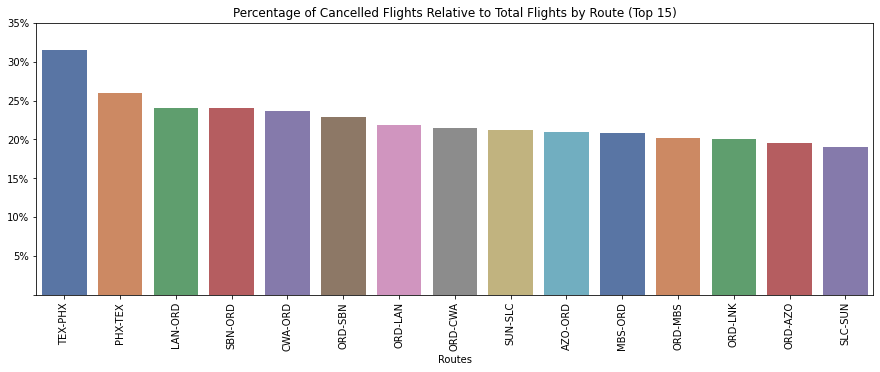

In [46]:
#Plotting Top 15

plt.figure(figsize=(15,5))
sb.barplot(data=df11.head(15), x='route', y='cancelled_proportion', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);
plt.xlabel('Routes');
plt.ylabel(None);
plt.yticks([0,5,10,15,20,25,30,35],['','5%','10%','15%','20%','25%','30%', '35%']);
plt.title('Percentage of Cancelled Flights Relative to Total Flights by Route (Top 15)');

**Observation:** It appears that some routes are definitely much worse than others. Some of the airports listed there were not noted in the destination and origin airport bivariate exploration. It appears that route might be a better indicator for cancellation rates instead of individual airports.

#### Bivariate Exploration #11:

#### Which carriers own the planes with most cancellation rates (from Bivariate Exploration #4)?

In [44]:
#List of Top 100 Planes with Highest Cancellation Rates from Bivariate Exploration #4
list1=list(df7.iloc[0:100].TailNum.values)

#Creating DF for plotting.
df12=df.copy()
df12=df12[df12.TailNum.isin(list1)]
df12=pd.DataFrame(df12.groupby('UniqueCarrier').TailNum.size())
df12=df12.reset_index()

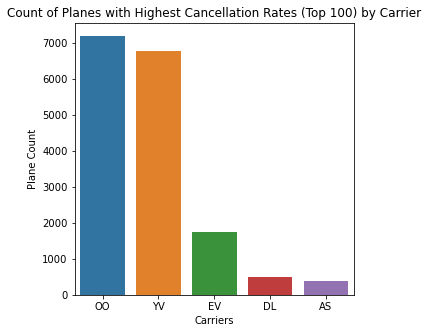

In [45]:
plt.figure(figsize=[5,5])
sb.barplot(data=df12, x='UniqueCarrier', y='TailNum', order=['OO','YV','EV','DL','AS']);
plt.ylabel('Plane Count');
plt.xlabel('Carriers')
plt.title('Count of Planes with Highest Cancellation Rates (Top 100) by Carrier');

**Comments:** It appears that some of the carriers with the highest cancellation rates also have the most planes with the highest cancellation rates. It is unclear on weather this is due to faulty or old planes as plane ages or plane issues aren't included in this data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Following up with the univariate exploration, it seems that some cancellation rates are higher when looking at carriers, destination, origin, and plane (tail number). These can have a cancellation rate up to ~30%. 

Distance and day of the week did not seem to have a big impact on cancellation rates. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I looked at whether correlation existed between distance, day of the week, and departure time. However, these do not seem to be correlated. 

I looked at cancellation codes distribution by carrier. This did seem to confirm that some carriers are worse than others leading to cancellations.

In the last two explorations, it seems that specific planes and specific carriers may strengthen or weaken each other in terms of cancellation rates. It appears that the carriers with the 10 worst cancellation rates own the 100 worst planes in terms of cancellation rates. Additionally, specific origin-destination combinations also have individual cancellation rates that may end up affecting a specific airport's cancellation rate. These combinations may strengthen or weaken each other, too.

## Multivariate Exploration

#### Multivariate Exploration #1:
#### What is the distribution of flight distances by carriers by cancellation status?

**Observation:** 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


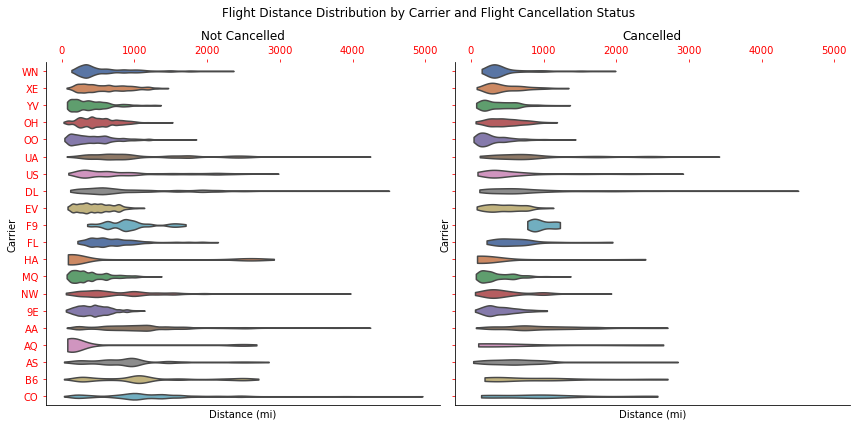

In [498]:
g = sb.FacetGrid(data=df, col='Cancelled', col_order=[0, 1], height=6);
g.map(sb.violinplot,'Distance','UniqueCarrier', palette='deep',inner=None, cut=0, order=None);
axes=g.axes.flatten();
g.set(xlabel='Distance (mi)', ylabel='Carrier')
axes[0].set_title('Not Cancelled');
axes[1].set_title('Cancelled');
g.fig.subplots_adjust(top=0.85);
g.fig.suptitle('Flight Distance Distribution by Carrier and Flight Cancellation Status');

**Observation:** The distribution is similar between both cancelled and non-cancelled flights, which means that most cancelled flights occur when most flights occur, too, which we noted in a previous exploration. This also confirms our previous explorations where most carriers perform flights at less than 1000mi and most cancellations occur at less than 1000mi due to sheer volume. 

#### Multivariate Exploration #2:
#### How is flight cancellation status distributed when laid out by day of the week and departure time?

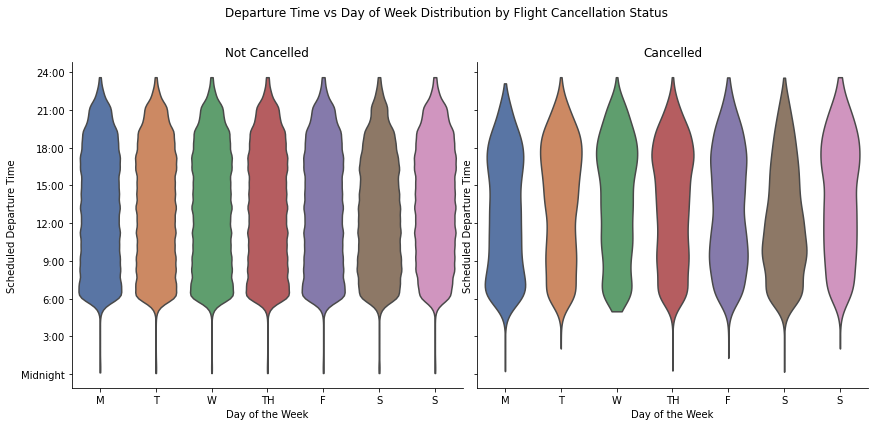

In [220]:
g = sb.FacetGrid(data=df, col='Cancelled', col_order=[0, 1], height=6);
g.map(sb.violinplot,'DayOfWeek','CRSDepTime', palette='deep', order=[1,2,3,4,5,6,7], cut=0, inner=None);
g.set(xticks=[0,1,2,3,4,5,6],xticklabels=['M','T','W','TH','F','S','S']);
g.set(yticks=[0,300,600,900,1200,1500,1800,2100,2400],yticklabels=['Midnight','3:00','6:00','9:00','12:00','15:00','18:00', '21:00', '24:00']);
axes=g.axes.flatten();
g.set(xlabel='Day of the Week', ylabel='Scheduled Departure Time')
axes[0].set_title('Not Cancelled');
axes[1].set_title('Cancelled');
g.fig.subplots_adjust(top=0.85);
g.fig.suptitle('Departure Time vs Day of Week Distribution by Flight Cancellation Status');

**Observation:** As previously noted, flights appear to be well distributed during the day. Total cancellation counts also correlates with times when most flights occur as expected. Flight distribution by days appears to be mostly uniform even across different departure times.

#### Multivariate Exploration #3:
#### How are cancellations distributed when laid out by Day of the Week and Day of the Month?

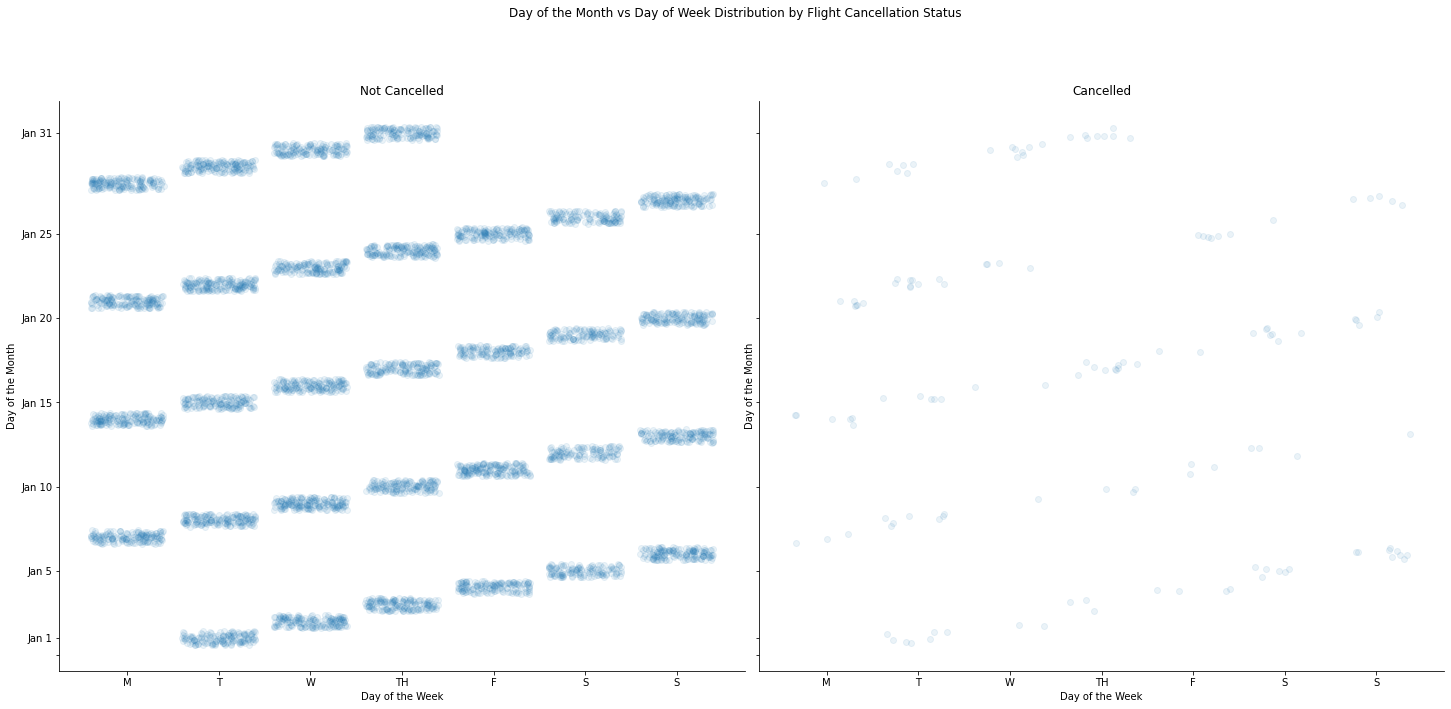

In [366]:
#Creating Facet Grid and sampling 5,000 samples from the 600,000 entries for plotting.
g = sb.FacetGrid(data=df.sample(5000, replace=False), col='Cancelled', col_order=[0, 1], height=10);

#Plotting
g.map(sb.regplot,'DayOfWeek','DayofMonth', x_jitter=0.4,y_jitter=0.4, fit_reg=False, scatter_kws={'alpha':0.085});
g.set(xticks=[1,2,3,4,5,6,7],xticklabels=['M','T','W','TH','F','S','S']);
g.set(yticks=[0,1,5,10,15,20,25,31],yticklabels=['','Jan 1', 'Jan 5', 'Jan 10', 'Jan 15', 'Jan 20', 'Jan 25', 'Jan 31']);
axes=g.axes.flatten();
axes[0].set_title('Not Cancelled');
axes[1].set_title('Cancelled');
g.set(xlabel='Day of the Week', ylabel='Day of the Month')
g.fig.subplots_adjust(top=0.85);
g.fig.suptitle('Day of the Month vs Day of Week Distribution by Flight Cancellation Status');

**Observation:** Looking at the plot, it appears that flights are generally uniformly distributed between days of the month and week. Cancellations rates also appear to be mostly uniformly distributed. No particular correlation is noted here.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationships noted mostly did not seem to have any particular correction because features were mostly uniformly distributed between each other or showed similar characteristics across different features. We noted that cancelled flights (raw count) tends to also along where most flights also occur at least when looking at distance, day of the week, day of the month, and departure time.

### Were there any interesting or surprising interactions between features?

It was interesting to not how uniformly distributed flights were between different features.